# Introduction #
In this notebook we use some data from National Institute of Diabetes and Digestive and Kidney Diseases.The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

In [30]:
                               ## Importing usefull libraries ##
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split #To test the data#
from sklearn.neighbors import KNeighborsClassifier   # KNN algorithm #
from sklearn import metrics # To test the accuracy #
from sklearn.metrics import confusion_matrix # for confusion matrics #
from IPython.display import Image

In [31]:
da = pd.read_csv('D:/Data/diabetes.csv') # Reading the data 

In [32]:
da.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Lets see the columns contents in histograms to see if the data ready to be used

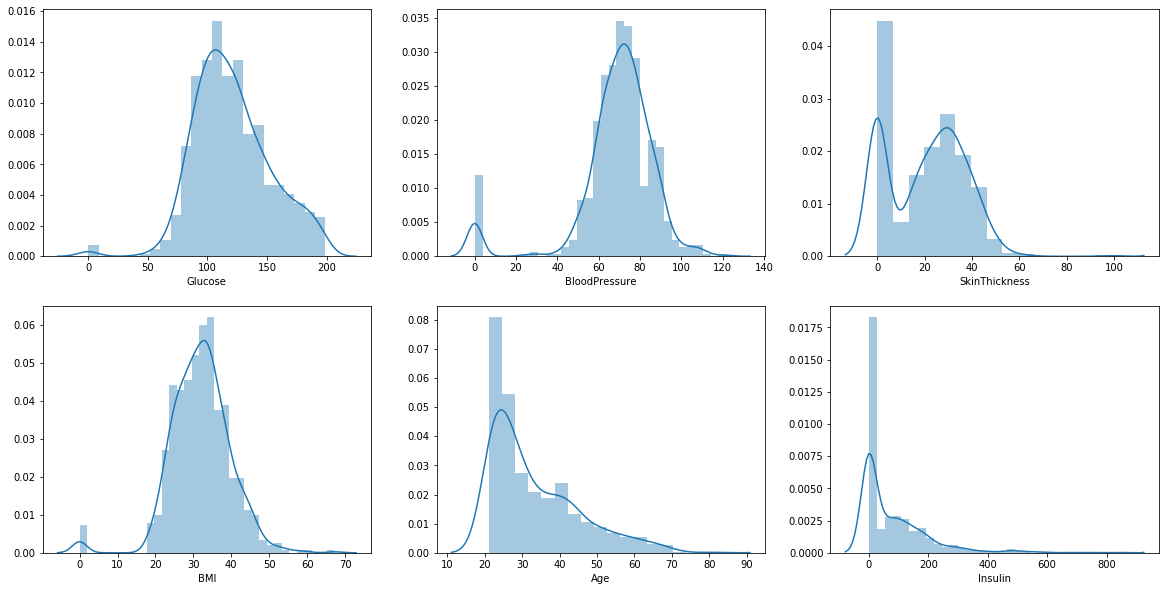

In [33]:
plt.figure(figsize = (20,10))
plt.subplot(2,3,1)
sns.distplot(da['Glucose'])
plt.subplot(2,3,2)
sns.distplot(da['BloodPressure'])
plt.subplot(2,3,3)
sns.distplot(da['SkinThickness'])
plt.subplot(2,3,4)
sns.distplot(da['BMI'])
plt.subplot(2,3,5)
sns.distplot(da['Age'])
plt.subplot(2,3,6)
sns.distplot(da['Insulin'])

We see that columns contains alot of 0_valued rows that will make erros in our conclusions so we will deal with these rows

In [34]:
# Replacing any 0-valued row in these specific columns with the mean 
da[['Glucose','BloodPressure','SkinThickness','BMI']]=da[['Glucose','BloodPressure','SkinThickness','BMI']].replace(0,da.mean())

#Since the insulin concentration for some people can be zero we didnt use the same code for its column
da.loc[(da['Insulin'] == 0) & (da['Outcome'] == 0) , 'Insulin'] = da['Insulin'].mean()

Lets check the data again

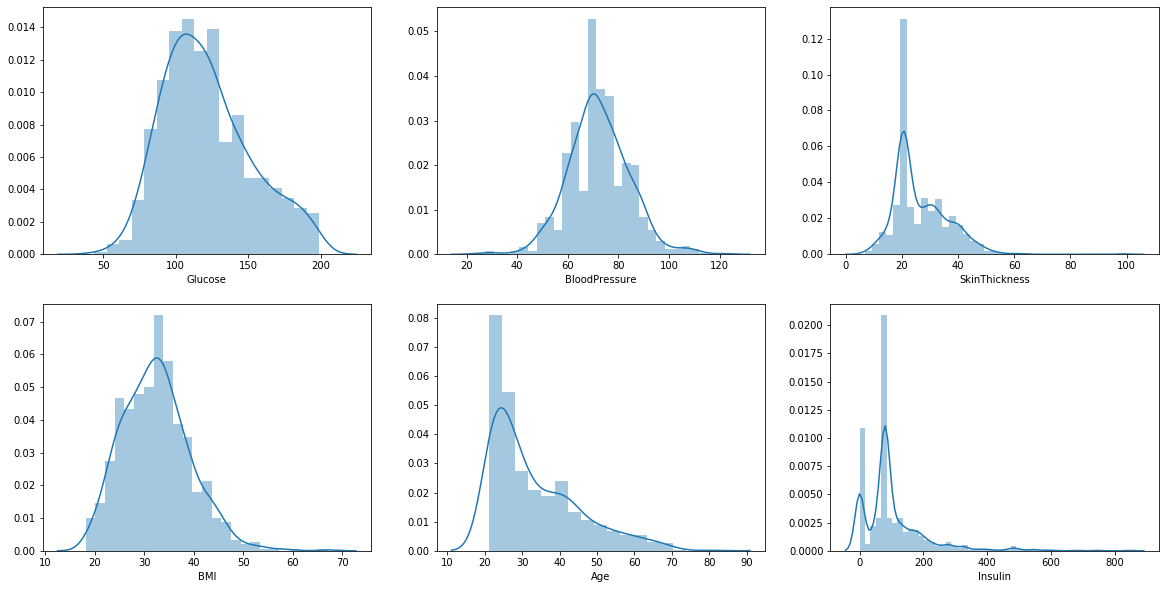

In [35]:
plt.figure(figsize = (20,10))
plt.subplot(2,3,1)
sns.distplot(da['Glucose'])
plt.subplot(2,3,2)
sns.distplot(da['BloodPressure'])
plt.subplot(2,3,3)
sns.distplot(da['SkinThickness'])
plt.subplot(2,3,4)
sns.distplot(da['BMI'])
plt.subplot(2,3,5)
sns.distplot(da['Age'])
plt.subplot(2,3,6)
sns.distplot(da['Insulin'])

We see that most of columns can be used to in the model but lets make sure of column like "Pregnancies" and make sure that it should be used in this model

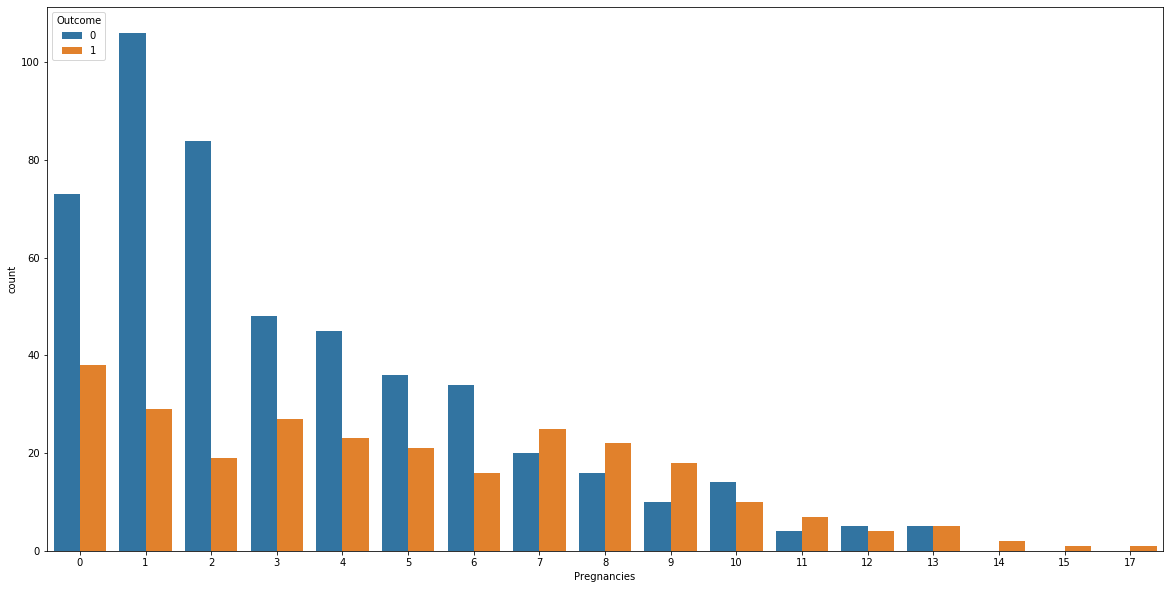

In [36]:
# Making sure that pregnancies realy affect the model
plt.figure(figsize = (20,10))
sns.countplot(x=da['Pregnancies'],hue= 'Outcome',data=da)

We see that more healthy women are with less pregnancies so we should for sure include that column in the model

Here are another two columns that are too important in this model "Glucose" and "Insulin" 

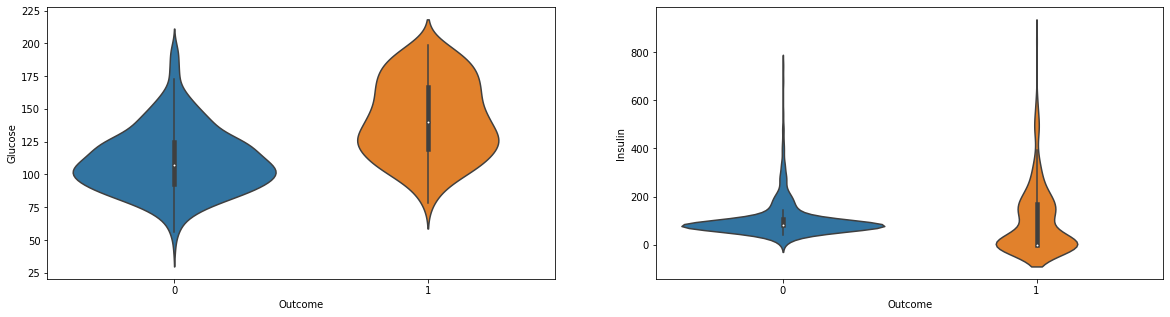

In [37]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
sns.violinplot(x="Outcome",y="Glucose",data=da)
plt.subplot(1,2,2)
sns.violinplot(x="Outcome",y="Insulin",data=da)

Its absolutely no possible that there some one with more that 150 Glucose concentration and doesnt have diabetes so its very important to fix this

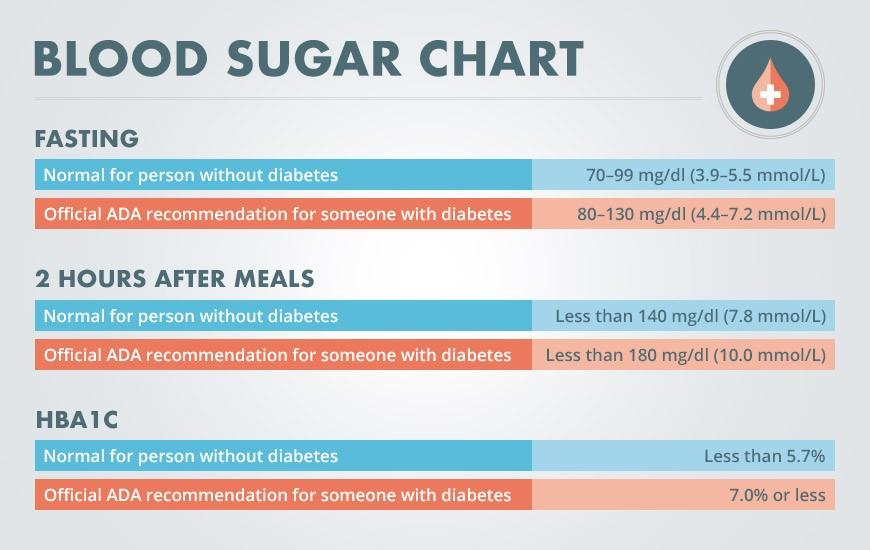

In [38]:
Image(filename = "D:/Data/diabetes.jpg", width = 600, height = 300)

In [39]:
da.loc[(da['Outcome']==0)&(da['Glucose']>140),'Glucose'] = 105
da.loc[(da['Outcome']==1)&(da['Glucose']<70),'Glucose'] = 130

Lets check the Glucose and the Insulin again

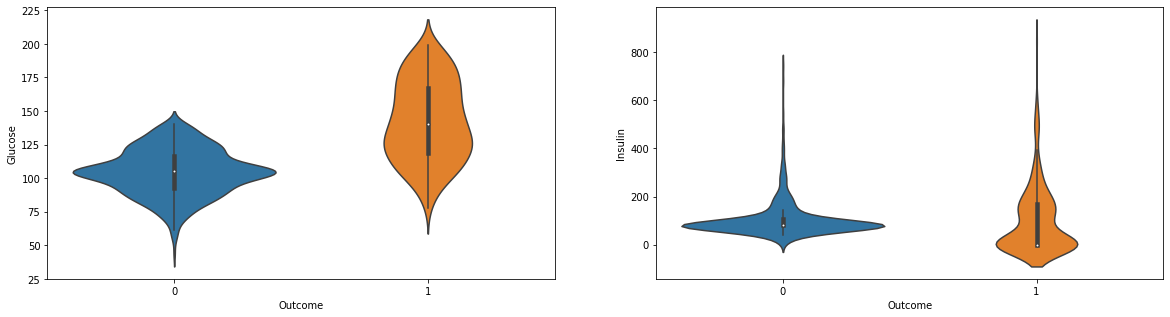

In [40]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
sns.violinplot(x="Outcome",y="Glucose",data=da)
plt.subplot(1,2,2)
sns.violinplot(x="Outcome",y="Insulin",data=da)

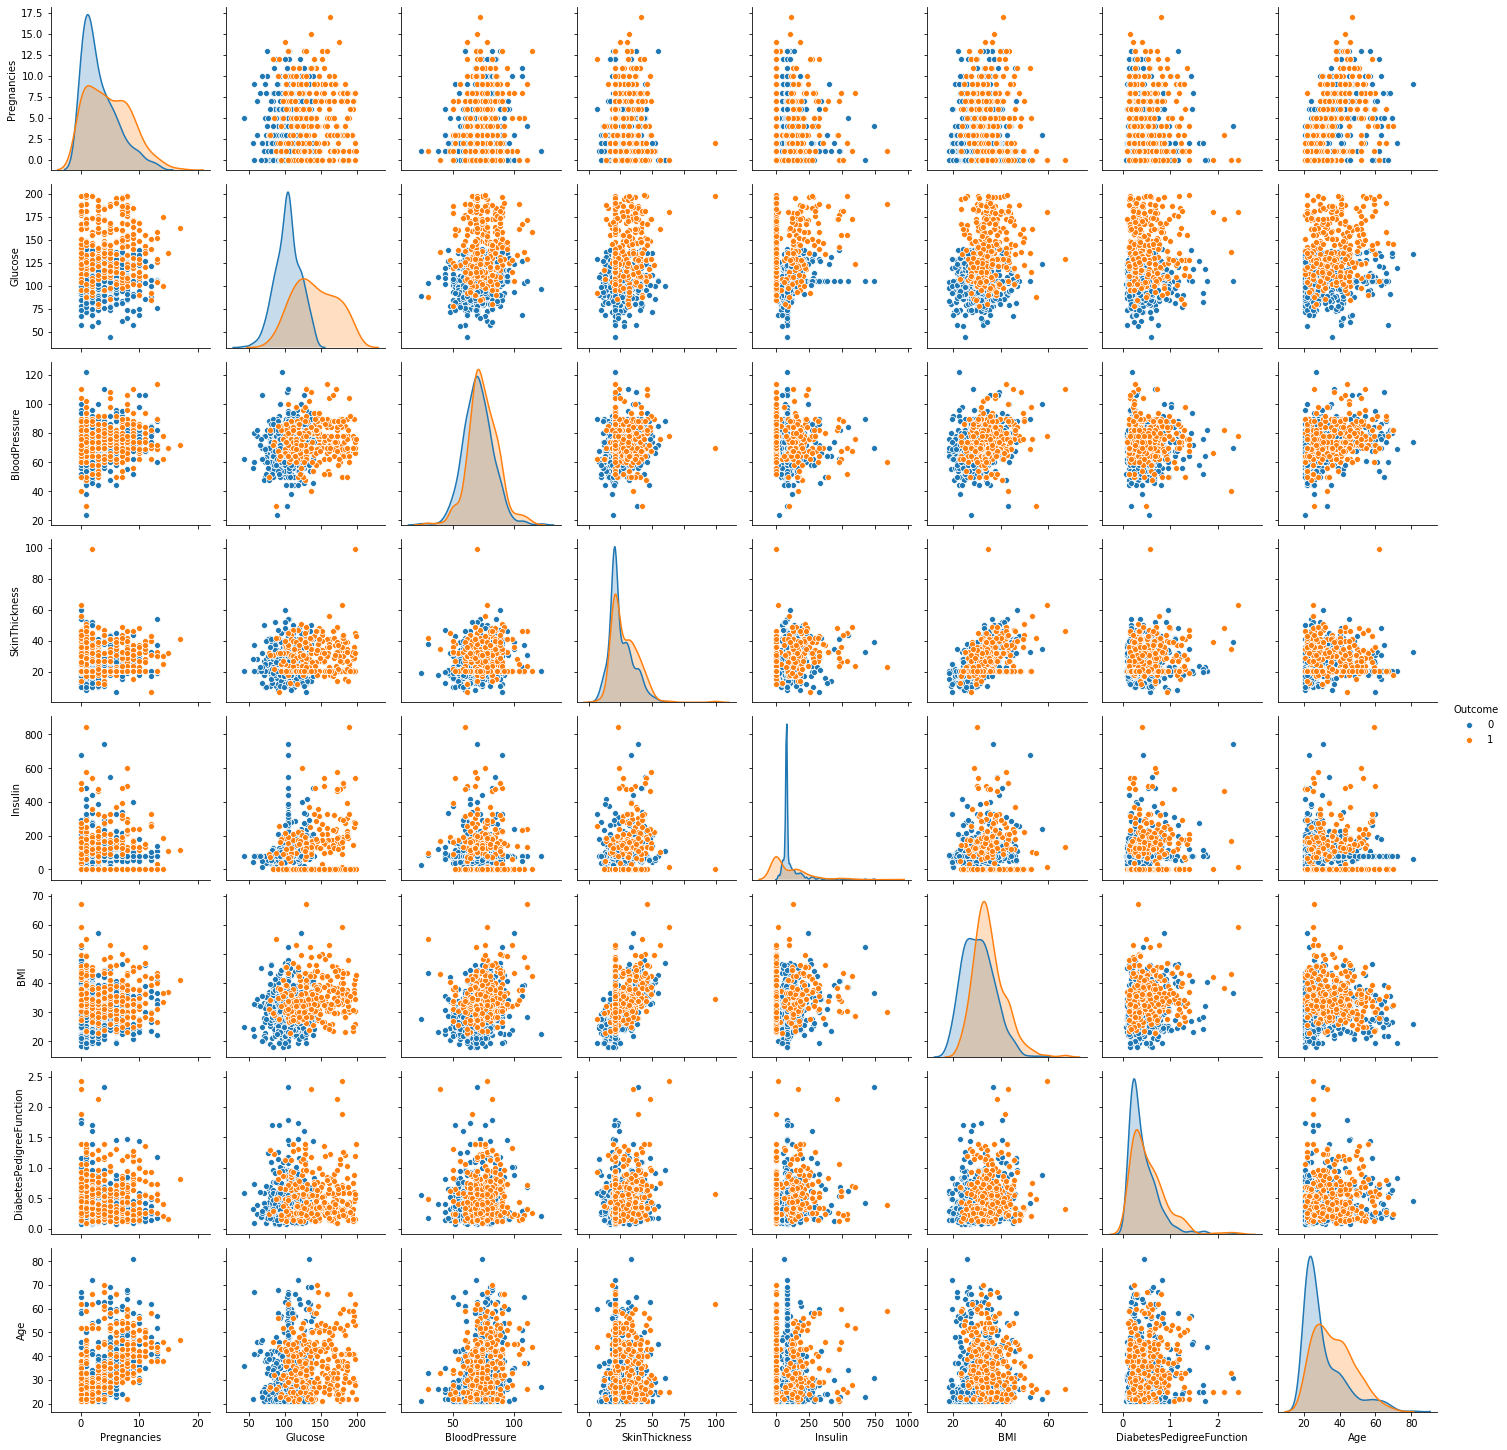

In [41]:
#Using pairplot to do some last observations
sns.pairplot(da,hue = 'Outcome',vars =['Pregnancies','Glucose','BloodPressure','SkinThickness',
                                       'Insulin','BMI','DiabetesPedigreeFunction','Age'])

# Modeling #
Lets begin with the algorithm we will use which is KNN algorithm

In [42]:
x_train,x_test,y_train,y_test = train_test_split(da.drop(columns = ['Outcome']),da['Outcome'],test_size = 0.3)
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)

In [43]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)) #checking the accuracy

Accuracy: 0.8961038961038961


Counfusion matrix part

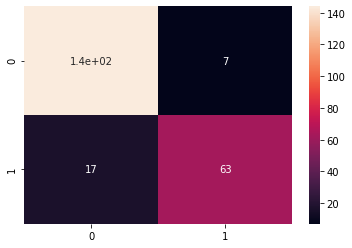

In [44]:
cnf_matrix=confusion_matrix(y_test,y_pred)
sns.heatmap(cnf_matrix,annot=True)